In [1]:
from iotbx.map_manager import map_manager as MapManager
from mmtbx.model import manager as ModelManager
from iotbx.data_manager import DataManager
from iotbx.map_model_manager import map_model_manager as MapModelManager

In [13]:
import os
import pickle
from multiprocessing import Pool
from collections import Counter
import numpy as np
from collections import OrderedDict
import operator
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
entry_composition_path = "data/entry_composition.pkl" #list of group_args objects
with open(entry_composition_path,"rb") as fh:
    entry_composition_list = pickle.load(fh)

In [4]:
ligand_list = []
for entry in entry_composition_list:

    composition = entry.composition
    ligands = composition._result.other_cnts.keys()
    for ligand in ligands:
        ligand_list.append(ligand)

In [29]:
ligand_counter = Counter(ligand_list)

In [46]:
ligand_counter_sorted = OrderedDict(sorted(ligand_counter.items(), key=operator.itemgetter(1),reverse=True))

([<matplotlib.axis.XTick at 0x7fbd48448590>,
 <a list of 20 Text xticklabel objects>)

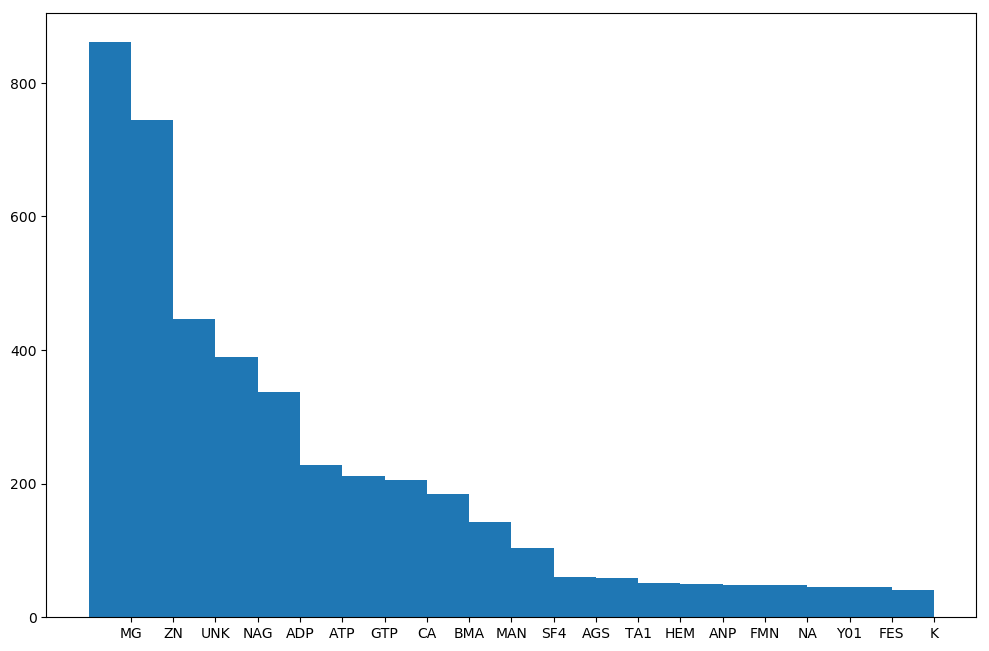

In [56]:
labels, values = zip(*ligand_counter_sorted.items()[:20])

indexes = np.arange(len(labels))
width = 1

fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)


In [63]:
# get entries with ADP, ATP, or GTP
nucleotide_entries = []
for entry in entry_composition_list:
    composition = entry.composition
    ligands = composition._result.other_cnts.keys()
    if ("ATP" in ligands) or ("ADP" in ligands) or ("GTP" in ligands):
        nucleotide_entries.append(entry)

In [65]:
nucleotide_entries_path = "data/nucleotide_entries.pkl"
with open(nucleotide_entries_path,"wb") as fh:
    pickle.dump(nucleotide_entries,fh)